---
This notebook will take an image of a hand of cards and it will identify individual cards.

---

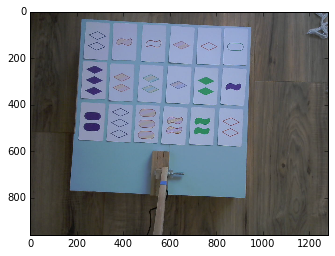

In [245]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt


image = cv2.imread('irl-dealt-hand-images/dealt-hand-1.png')
image = cv2.cvtColor(image, cv2.cv.CV_BGR2RGB)

#plt.figure(figsize=(15,15))
_ = plt.imshow(image)

---
Crop and transform.

---

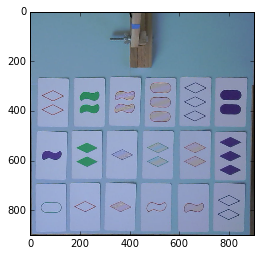

In [246]:
import numpy as np


size = 900

# Find contours.
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (1,1), 10)
_, thresholded = cv2.threshold(blur, 118, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresholded, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Mask to the largest contour.
#mask = np.zeros_like(image)
#cv2.drawContours(mask, contours, 0, 255, -1)
#out = np.zeros_like(image)
#out[mask == 255] = image[mask == 255]

#perimeter = cv2.arcLength(contours[0], True)
#approx = cv2.approxPolyDP(contours[0], 0.02*perimeter, True)
rect = cv2.minAreaRect(contours[0])
r = np.array(cv2.cv.BoxPoints(rect), np.float32)

h = np.array([[0, 0], [size, 0], [size, size], [0, size]], np.float32)
transform = cv2.getPerspectiveTransform(r, h)
warp = cv2.warpPerspective(image, transform, (size, size))

#_ = plt.figure(figsize=(15,15))
_ = plt.imshow(warp)

---
Now look for cards..

---

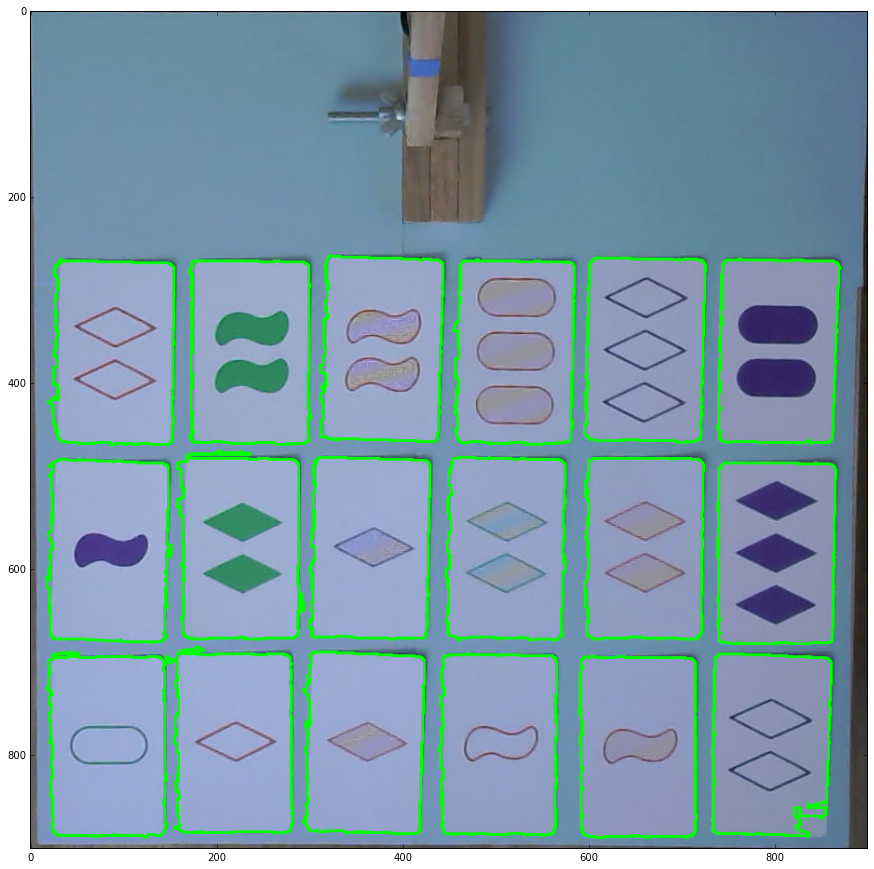

In [263]:
sensitivity = 84
lower_white = np.array([0, 0, 255-sensitivity])
upper_white = np.array([255, sensitivity, 255])
hsv_img = cv2.cvtColor(warp, cv2.COLOR_BGR2HSV)
thresh = cv2.inRange(hsv_img, lower_white, upper_white)

# # HLS space: H on 0, 180; L and S on 0, 255
# sensitivity = 83
# lower_white = np.array([0, 255-sensitivity, 0])
# upper_white = np.array([360, 255, 255])
# hls_image = cv2.cvtColor(warp, cv2.COLOR_BGR2HLS)
# thresh = cv2.inRange(hls_image, lower_white, upper_white)

contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[0:18]
new_image = warp.copy()
cv2.drawContours(new_image, contours, contourIdx=-1, color=(0, 255, 0), thickness=2)

_ = plt.figure(figsize=(15,15))
_ = plt.imshow(new_image)